<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: аналитик-разработчик в команде Яндекс.Метрики Мария Мансурова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 9
## <center> Анализ временных рядов
**Заполните код в клетках и выберите ответы в [веб-форме](https://docs.google.com/forms/d/1l3OtddjlKGGyl285bkzu4ulH5cXSnBdAkqR9VzB3Bgg/edit).**

In [1]:
import pandas as pd
import os

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd

print(__version__) # need 1.9.0 or greater

init_notebook_mode(connected = True)




def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

2.2.3


## Подготавливаем данные

Для начала скачаем данные в `dataframe`. Сегодня будем предсказывать просмотры wiki-страницы [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning). Данные я скачала с помощью библиотеки [Wikipediatrend](https://www.r-bloggers.com/using-wikipediatrend/) для `R`.

In [2]:
df = pd.read_csv('../../data/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.shape

(383, 7)

In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
plotly_df(df.set_index('date')[['count']])

## Предсказание с помощью Facebook Prophet

Для начала построим предсказание с помощью простой библиотеки `Facebook Prophet`. Для того, чтобы посмотреть на качество модели, отбросим из обучающей выборки последние 30 дней.

In [6]:
from fbprophet import Prophet

In [7]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
train_df = df[:-predictions].copy()

In [8]:
## ВАШ КОД для построения модели ##

m = Prophet()
m.fit(train_df)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/pavelvpster/.local/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [9]:

future = m.make_future_dataframe(periods=30)
future.tail()


,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [10]:

forecast = m.predict(future)
forecast.tail()


,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
378,2016-01-16,2979.025814,2961.335461,2996.991377,1718.940096,2556.650015,-861.719253,-861.719253,-861.719253,-861.719253,-861.719253,-861.719253,-861.719253,-861.719253,-861.719253,2117.306561
379,2016-01-17,2984.428244,2965.591719,3003.471844,1877.208731,2678.090952,-720.703874,-720.703874,-720.703874,-720.703874,-720.703874,-720.703874,-720.703874,-720.703874,-720.703874,2263.724370
380,2016-01-18,2989.830675,2969.555993,3009.928105,2883.297969,3692.030795,281.391058,281.391058,281.391058,281.391058,281.391058,281.391058,281.391058,281.391058,281.391058,3271.221733
381,2016-01-19,2995.233106,2973.939443,3016.609373,3141.522020,3933.150172,541.447205,541.447205,541.447205,541.447205,541.447205,541.447205,541.447205,541.447205,541.447205,3536.680311
382,2016-01-20,3000.635537,2978.340339,3023.608859,3038.164694,3826.008430,425.560146,425.560146,425.560146,425.560146,425.560146,425.560146,425.560146,425.560146,425.560146,3426.195682


In [11]:

print(', '.join(forecast.columns))


ds, trend, trend_lower, trend_upper, yhat_lower, yhat_upper, seasonal, seasonal_lower, seasonal_upper, seasonalities, seasonalities_lower, seasonalities_upper, weekly, weekly_lower, weekly_upper, yhat


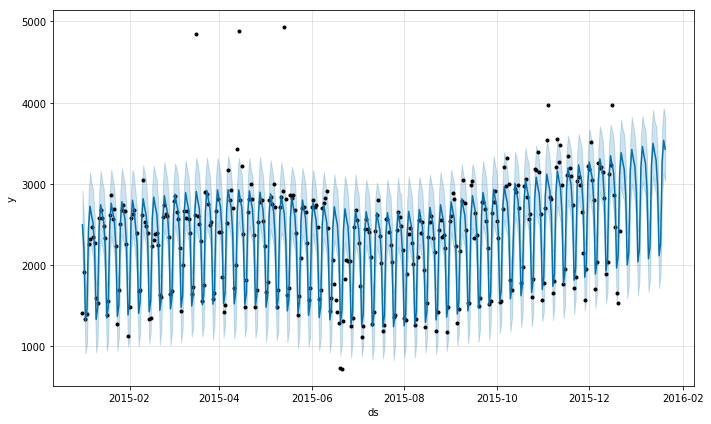

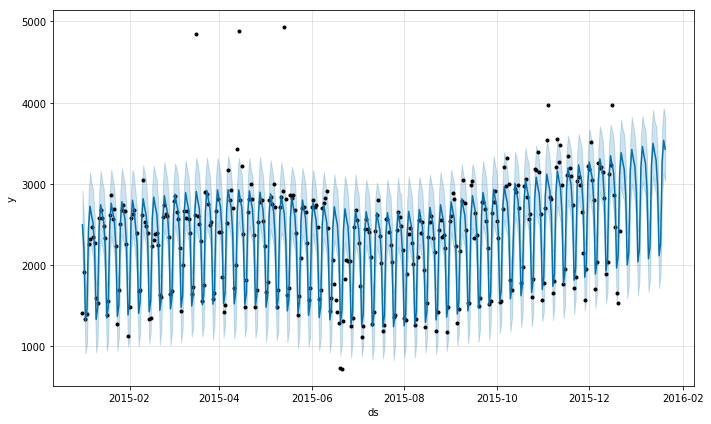

In [12]:

m.plot(forecast)


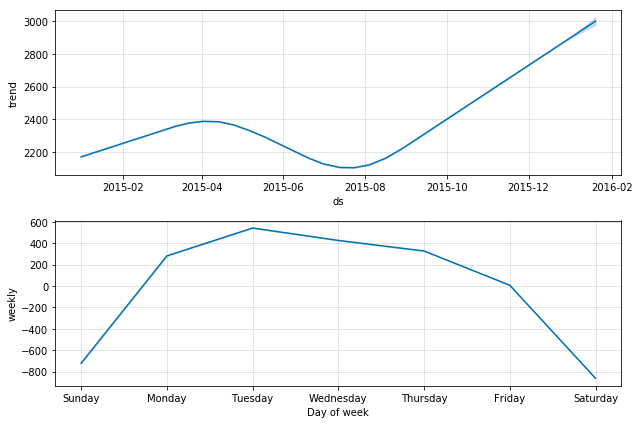

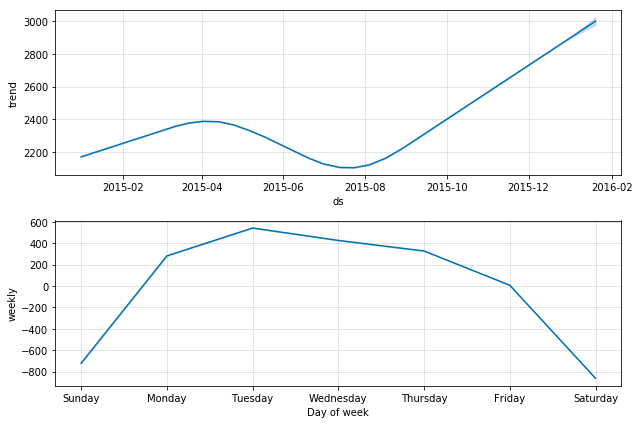

In [13]:

m.plot_components(forecast)


**Вопрос 1:** Какое предсказание числа просмотров wiki-страницы на 20 января? Ответ округлите до целого числа.

Оценим качество предсказания по последним 30 точкам.

In [14]:
## ВАШ КОД для оценки качества полученной модели ##

forecast[forecast['ds'] == '2016-01-20']['yhat']


382    3426.195682
Name: yhat, dtype: float64

In [15]:

cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
np.mean(abs(cmp_df[-predictions:]['p'])), np.mean(abs(cmp_df[-predictions:]['e']))


(34.4924176874189, 599.6208232990797)

**Вопрос 2**: Какое получилось MAPE?

**Вопрос 3**: Какое получилось MAE?

In [16]:
# MAPE = 34.
# MAE = 599.

## Предсказываем с помощью ARIMA

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

/home/pavelvpster/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



**Вопрос 4:** Проверим стационарность ряда с помощью критерия Дики-Фулера. Является ли ряд стационарным? Какое значение p-value?

Критерий Дики-Фуллера: p=0.107392


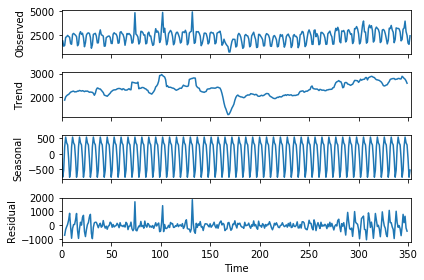

In [18]:
## ВАШ КОД для проверки стационарности ряда ##

sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])


In [19]:
# Ряд не является стационарным

Критерий Дики-Фуллера: p=0.000000


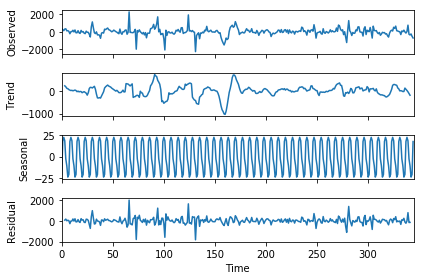

In [20]:

train_df.index = pd.to_datetime(train_df.index)

train_df['y_diff'] = train_df.y - train_df.y.shift(7)

sm.tsa.seasonal_decompose(train_df.y_diff[8:].values, freq=7).plot();

print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(train_df['y_diff'][8:])[1])


In [21]:
# Теперь ряд стал стационарным

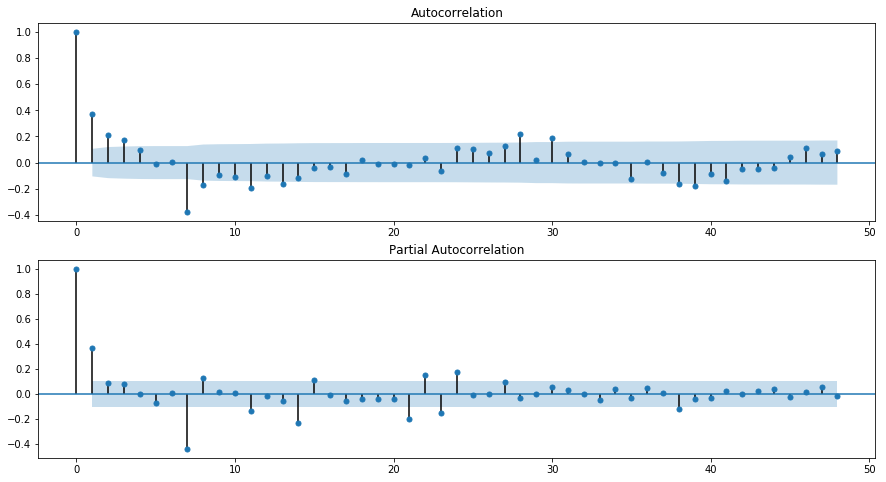

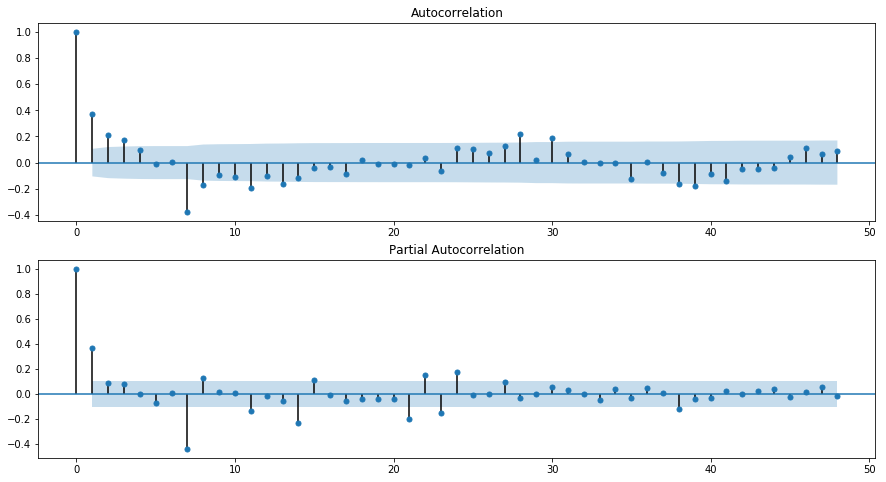

In [22]:

plt.figure(figsize=(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_diff[8:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_diff[8:].values.squeeze(), lags=48, ax=ax)


**Вопрос 5**: Далее перейдем к построению модели SARIMAX (`sm.tsa.statespace.SARIMAX`). Модель c какими параметрами лучшая по `AIC`-критерию?

In [26]:
## ВАШ КОД для построения модели ##


